In [1]:
# Required Libraries Imports
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import kagglehub
import missingno as msno
from dotenv import load_dotenv
# load_dotenv()

d:\Semester_9\ACL2\ACL-2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Download latest version
path = kagglehub.dataset_download("manishkumar7432698/airline-passangers-booking-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\manishkumar7432698\airline-passangers-booking-data\versions\4


In [3]:
# load dataset from the path indicated in .env file
path = r'data\raw\Passanger_booking_data.csv'
# data_path = os.getenv("ROOT_DATASET_PATH", path)
df = pd.read_csv(path)

In [4]:
# Start Looking at Data
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [5]:
# Make a standardized Naming Convention for columns using lowercase and underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


## Categorical Columns Analysis and Encoding

In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"There are {len(categorical_cols)} categorical columns: {categorical_cols}\n")

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Categories: {df[col].unique()}")
    print(f"  Value counts:")
    print(df[col].value_counts())


There are 5 categorical columns: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


sales_channel:
  Unique values: 2
  Categories: ['Internet' 'Mobile']
  Value counts:
sales_channel
Internet    44383
Mobile       5619
Name: count, dtype: int64

trip_type:
  Unique values: 3
  Categories: ['RoundTrip' 'CircleTrip' 'OneWay']
  Value counts:
trip_type
RoundTrip     49498
OneWay          387
CircleTrip      117
Name: count, dtype: int64

flight_day:


  Unique values: 7
  Categories: ['Tue' 'Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Fri']
  Value counts:
flight_day
Mon    8102
Wed    7675
Tue    7674
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

route:
  Unique values: 799
  Categories: ['AKLHGH' 'AKLDEL' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CC

Route Distribution:


C:\Users\user\AppData\Local\Temp\ipykernel_17924\46273312.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')


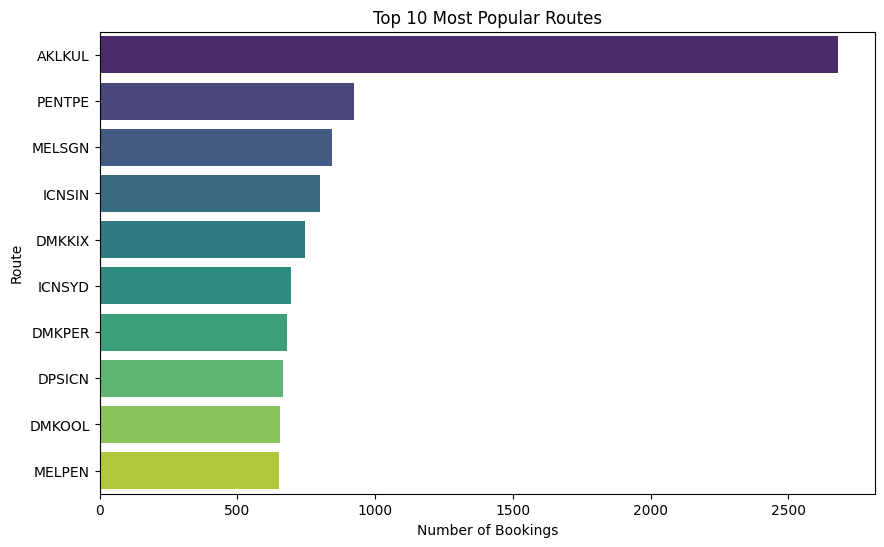

In [8]:
# Sort the routes by frequency and plot the 10 most common routes
route_counts = df['route'].value_counts()
print("Route Distribution:")

top_routes = route_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Bookings')
plt.ylabel('Route')
plt.show()

## Data Quality Checks

### Duplicates Handling

In [9]:
# 1. Check for duplicate rows
print(f"Total rows: {len(df)}")
print(f"Duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nShowing first few duplicates:")
    print(df[df.duplicated(keep=False)].head())

Total rows: 50002
Duplicate rows: 719

Showing first few duplicates:
     num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
117               1      Internet  RoundTrip             65             278   
119               1      Internet  RoundTrip            263              58   
124               1      Internet  RoundTrip             42              17   
137               4      Internet  RoundTrip            366              17   
179               5      Internet  RoundTrip            206              17   

     flight_hour flight_day   route booking_origin  wants_extra_baggage  \
117            2        Thu  AKLKUL       Malaysia                    0   
119            4        Sun  AKLKUL       Malaysia                    0   
124           14        Tue  AKLKUL       Malaysia                    0   
137           16        Sun  AKLKUL       Malaysia                    1   
179           13        Sun  AKLKUL       Malaysia                    1   

     

#### Remove Dups

In [10]:
# Remove duplicates (keeping first occurrence)
print(f"Rows before removing duplicates: {len(df)}")
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df)}")

Rows before removing duplicates: 50002
Rows after removing duplicates: 49283


### Visualize Numerical Distributions

In [11]:
def plot_distribution_and_boxplot(dataframe, column_name, figsize=(14, 5)):
    """
    Plot distribution (histogram with KDE) and box plot for a given column.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        The DataFrame containing the data
    column_name : str
        Name of the column to visualize
    figsize : tuple, optional
        Figure size (width, height). Default is (14, 5)
    
    Returns:
    --------
    fig, axes : matplotlib figure and axes objects

    """
  
    # Validate column exists
    if column_name not in dataframe.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame. Available columns: {list(dataframe.columns)}")
    
    # Set style
    sns.set_style("whitegrid")
    
    # Create figure with 2 subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(f'Distribution Analysis: {column_name}', fontsize=14, fontweight='bold')
    
    # Left plot: Distribution (histogram with KDE)
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f'{column_name} - Distribution')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = dataframe[column_name].mean()
    median_val = dataframe[column_name].median()
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].legend()
    
    # Right plot: Box plot
    sns.boxplot(data=dataframe, x=column_name, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{column_name} - Box Plot (Outlier Detection)')
    axes[1].set_xlabel(column_name)
    
    # Add statistics to box plot
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Add text box with statistics
    stats_text = f'Q1: {q1:.2f}\nQ3: {q3:.2f}\nIQR: {iqr:.2f}\nLower: {lower_bound:.2f}\nUpper: {upper_bound:.2f}'
    axes[1].text(0.02, 0.98, 
                 stats_text,
                 transform=axes[1].transAxes,
                 fontsize=9,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Summary Statistics for '{column_name}':")
    print(f"  Count:    {dataframe[column_name].count()}")
    print(f"  Mean:     {mean_val:.2f}")
    print(f"  Median:   {median_val:.2f}")
    print(f"  Std Dev:  {dataframe[column_name].std():.2f}")
    print(f"  Min:      {dataframe[column_name].min():.2f}")
    print(f"  Max:      {dataframe[column_name].max():.2f}")
    print(f"  Skewness: {dataframe[column_name].skew():.3f}")
    
    return fig, axes


## Column Wahed

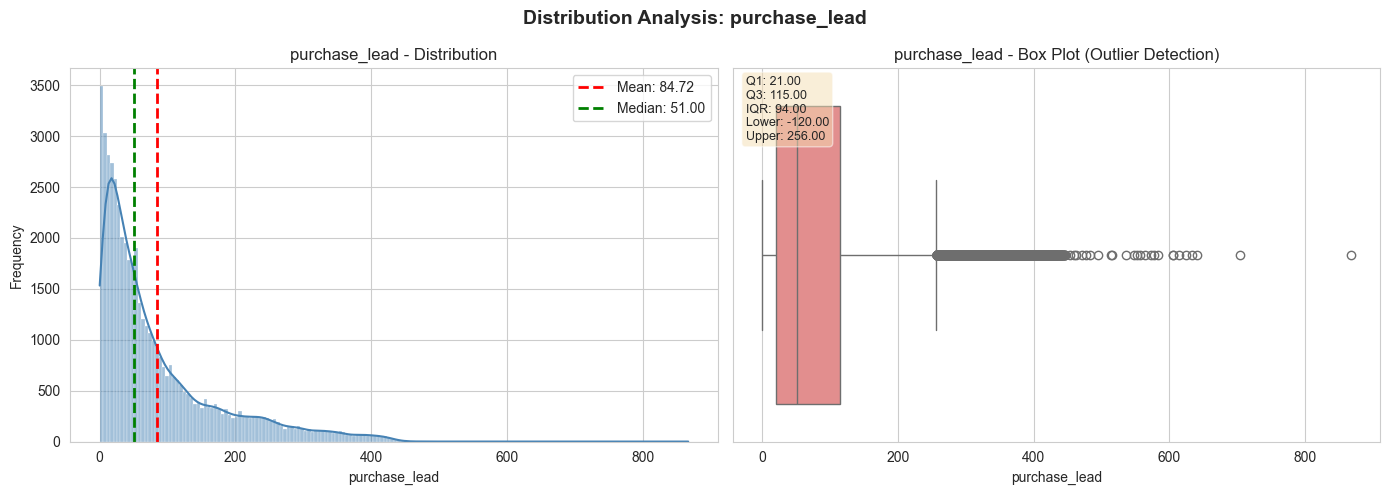

Summary Statistics for 'purchase_lead':
  Count:    49283
  Mean:     84.72
  Median:   51.00
  Std Dev:  90.41
  Min:      0.00
  Max:      867.00
  Skewness: 1.657


(<Figure size 1400x500 with 2 Axes>,
 array([<Axes: title={'center': 'purchase_lead - Distribution'}, xlabel='purchase_lead', ylabel='Frequency'>,
        <Axes: title={'center': 'purchase_lead - Box Plot (Outlier Detection)'}, xlabel='purchase_lead'>],
       dtype=object))

In [12]:
column_to_analyze = 'purchase_lead'
plot_distribution_and_boxplot(df, column_to_analyze)

### ALL

Analyzing 5 numerical features


Analyzing: num_passengers


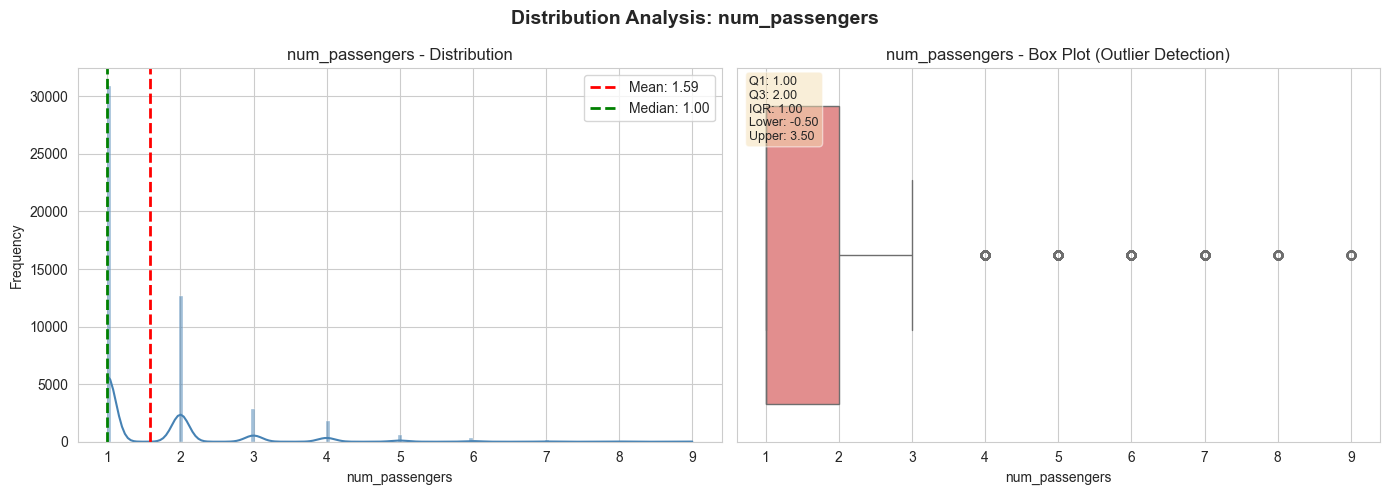

Summary Statistics for 'num_passengers':
  Count:    49283
  Mean:     1.59
  Median:   1.00
  Std Dev:  1.02
  Min:      1.00
  Max:      9.00
  Skewness: 2.688



Analyzing: purchase_lead


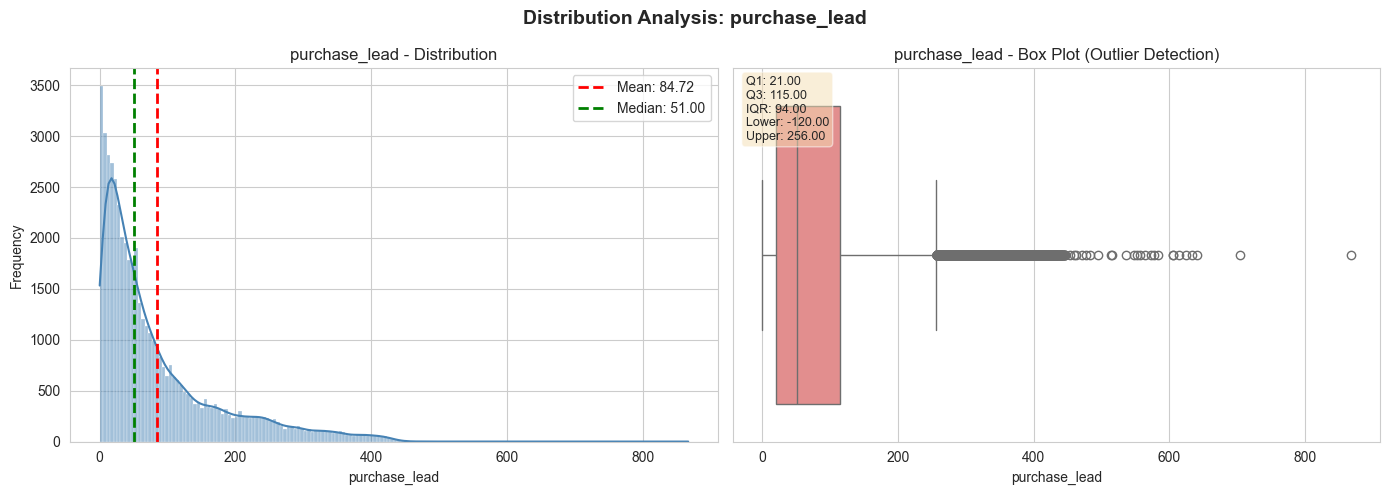

Summary Statistics for 'purchase_lead':
  Count:    49283
  Mean:     84.72
  Median:   51.00
  Std Dev:  90.41
  Min:      0.00
  Max:      867.00
  Skewness: 1.657



Analyzing: length_of_stay


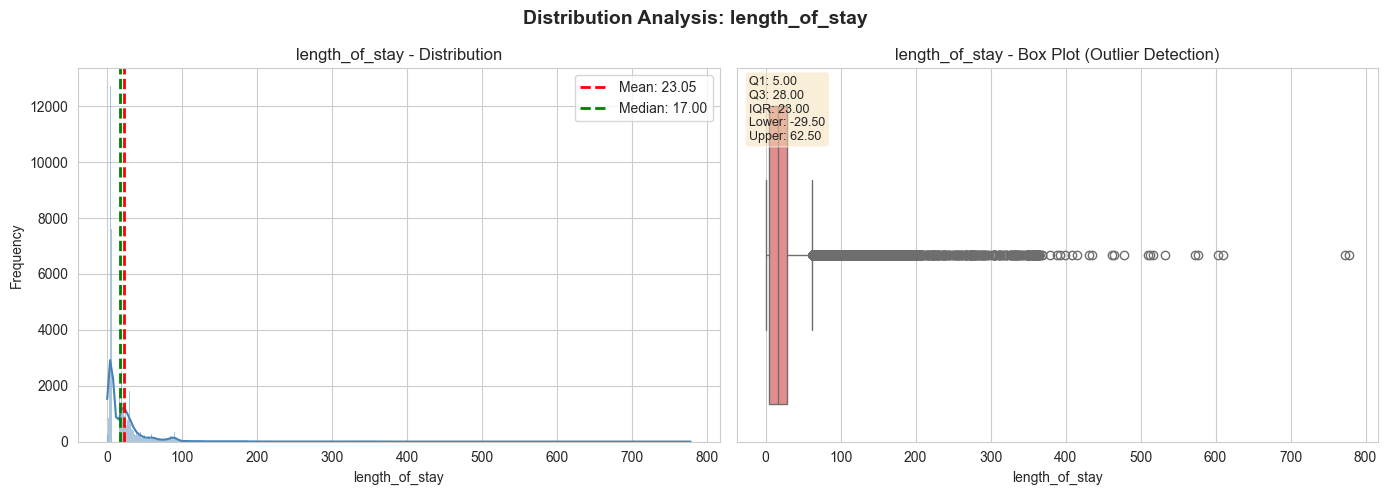

Summary Statistics for 'length_of_stay':
  Count:    49283
  Mean:     23.05
  Median:   17.00
  Std Dev:  33.83
  Min:      0.00
  Max:      778.00
  Skewness: 5.296



Analyzing: flight_hour


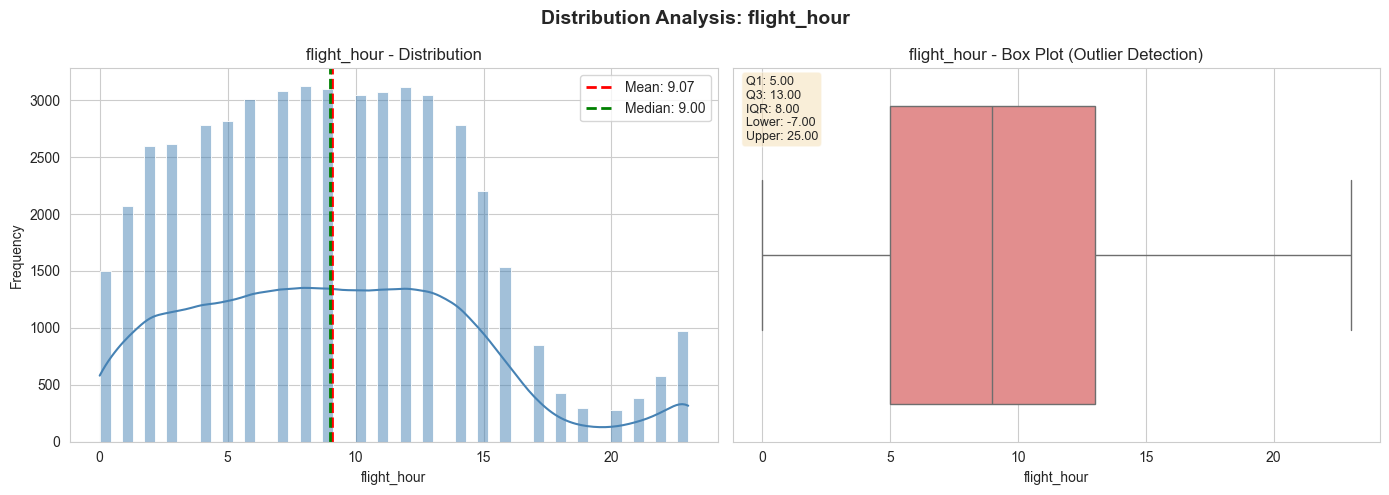

Summary Statistics for 'flight_hour':
  Count:    49283
  Mean:     9.07
  Median:   9.00
  Std Dev:  5.41
  Min:      0.00
  Max:      23.00
  Skewness: 0.398



Analyzing: flight_duration


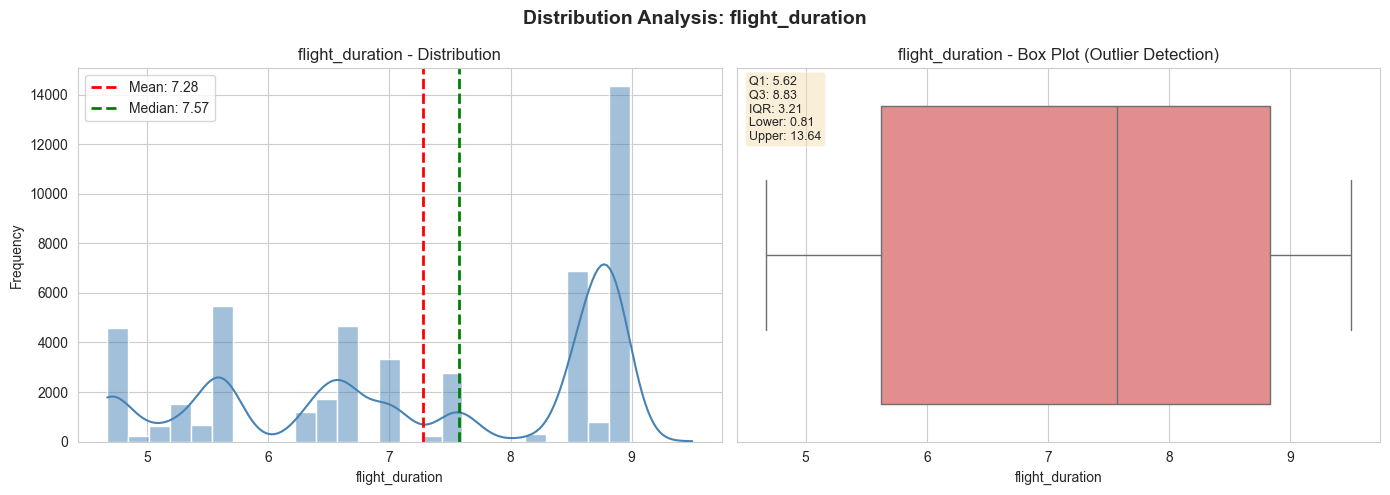

Summary Statistics for 'flight_duration':
  Count:    49283
  Mean:     7.28
  Median:   7.57
  Std Dev:  1.50
  Min:      4.67
  Max:      9.50
  Skewness: -0.362




In [13]:
# Visualize all numerical columns using the function
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 
                  'flight_duration']


print(f"Analyzing {len(numerical_cols)} numerical features\n")

# Loop through each column and plot
for col in numerical_cols:
    print(f"\nAnalyzing: {col}")
    plot_distribution_and_boxplot(df, col)
    print("\n")



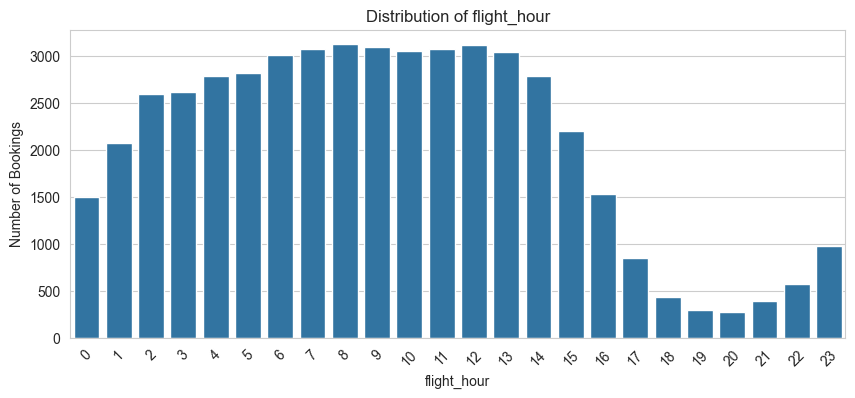

In [14]:
# Additional EDA - Print the value counts for numerical columns
# numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 
#                   'flight_duration']

numerical_cols= ['flight_hour']

# Plot the sorted value counts for numerical columns using bar plots
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().sort_index().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()


### Detect Outliers Based on Logical Thresholds

In [15]:
# Define business logic thresholds for outlier detection
thresholds = {
    'num_passengers': {'min': 1, 'max': 6, 'description': 'Maximum group size (keeping all)'},
    'purchase_lead': {'min': 0, 'max': 365, 'description': 'Max 1 year advance booking'},
    'length_of_stay': {'min': 0, 'max': 180, 'description': 'Max 6 months stay'},
    'flight_hour': {'min': 0, 'max': 23, 'description': 'Valid hours (0-23)'},
    'flight_duration': {'min': 0.5, 'max': 16, 'description': 'Realistic flight duration (0.5-16 hours)'}
}

print("Outlier Detection using Business Logic Thresholds:")

total_outliers = 0
outlier_summary = {}

for col, limits in thresholds.items():
    if col in df.columns:
        # Find values outside the threshold
        outliers_mask = (df[col] < limits['min']) | (df[col] > limits['max'])
        outliers_count = outliers_mask.sum()
        total_outliers += outliers_count
        
        print(f"\n{col}:")
        print(f"  Threshold: {limits['min']} - {limits['max']} ({limits['description']})")
        print(f"  Current range: {df[col].min()} - {df[col].max()}")
        print(f"  Values outside threshold: {outliers_count} ({outliers_count/len(df)*100:.2f}%)")
        
        if outliers_count > 0:
            outlier_values = df[outliers_mask][col].values
            print(f"  Sample outlier values: {outlier_values[:10]}")
            outlier_summary[col] = outliers_count
        
        print("-" * 70)

print(f"TOTAL ROWS WITH OUTLIERS in at least one column: {total_outliers}")
print(f"\nColumns with outliers:")
for col, count in outlier_summary.items():
    print(f"  - {col}: {count} rows ({count/len(df)*100:.2f}%)")

Outlier Detection using Business Logic Thresholds:

num_passengers:
  Threshold: 1 - 6 (Maximum group size (keeping all))
  Current range: 1 - 9
  Values outside threshold: 259 (0.53%)
  Sample outlier values: [7 9 8 7 8 7 7 7 7 7]
----------------------------------------------------------------------

purchase_lead:
  Threshold: 0 - 365 (Max 1 year advance booking)
  Current range: 0 - 867
  Values outside threshold: 823 (1.67%)
  Sample outlier values: [378 366 384 396 380 419 417 368 368 410]
----------------------------------------------------------------------

length_of_stay:
  Threshold: 0 - 180 (Max 6 months stay)
  Current range: 0 - 778
  Values outside threshold: 368 (0.75%)
  Sample outlier values: [207 274 196 278 208 204 238 275 203 188]
----------------------------------------------------------------------

flight_hour:
  Threshold: 0 - 23 (Valid hours (0-23))
  Current range: 0 - 23
  Values outside threshold: 0 (0.00%)
--------------------------------------------------

### Remove Outliers Based on the Thresholds

In [16]:
# Remove rows with outliers based on business logic thresholds
print(f"Original dataset size: {len(df)} rows")

# Create a mask for rows to keep (within all thresholds)
keep_mask = pd.Series([True] * len(df), index=df.index)

for col, limits in thresholds.items():
    if col in df.columns:
        # Update mask to exclude rows outside thresholds
        valid_mask = (df[col] >= limits['min']) & (df[col] <= limits['max'])
        rows_to_remove = (~valid_mask).sum()
        
        if rows_to_remove > 0:
            print(f"\n{col}:")
            print(f"  Removing {rows_to_remove} rows outside range [{limits['min']}, {limits['max']}]")
            keep_mask &= valid_mask

# Apply the filter
df_cleaned = df[keep_mask].copy()

print(f"Rows removed: {len(df) - len(df_cleaned)} ({(len(df) - len(df_cleaned))/len(df)*100:.2f}%)")
print(f"Cleaned dataset size: {len(df_cleaned)} rows")

# Update the main dataframe
df = df_cleaned

print("\n  Outliers removed successfully!")
print(f"Final dataset: {len(df)} rows, {len(df.columns)} columns")

Original dataset size: 49283 rows

num_passengers:
  Removing 259 rows outside range [1, 6]

purchase_lead:
  Removing 823 rows outside range [0, 365]

length_of_stay:
  Removing 368 rows outside range [0, 180]
Rows removed: 1440 (2.92%)
Cleaned dataset size: 47843 rows

  Outliers removed successfully!
Final dataset: 47843 rows, 14 columns


### Vizualize Again after removing the outliers

num_passengers (Post Outlier Removal)


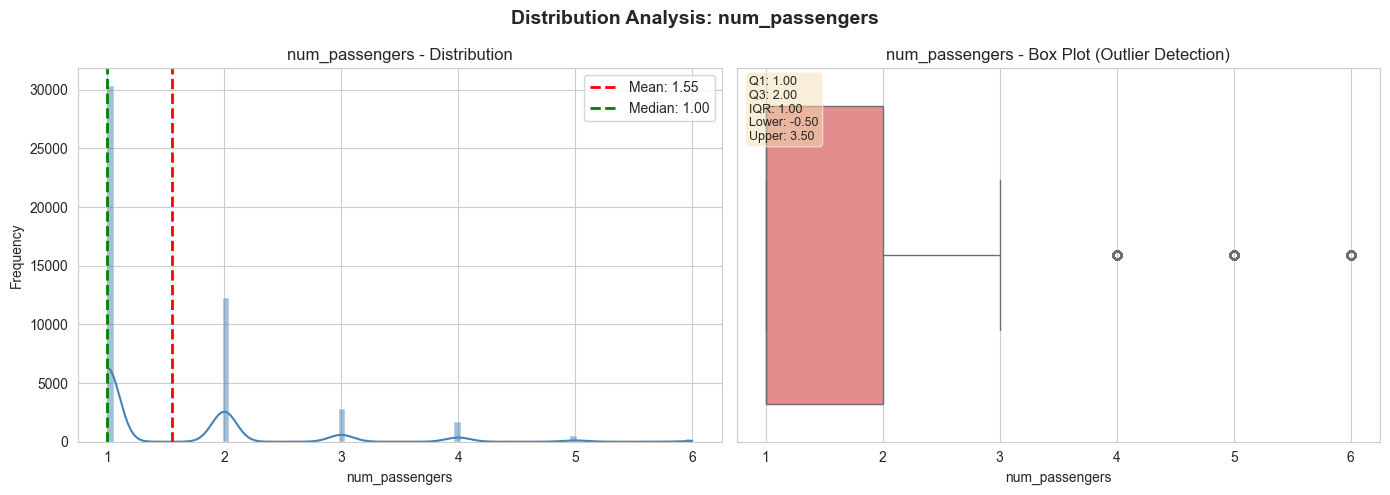

Summary Statistics for 'num_passengers':
  Count:    47843
  Mean:     1.55
  Median:   1.00
  Std Dev:  0.91
  Min:      1.00
  Max:      6.00
  Skewness: 2.104


purchase_lead (Post Outlier Removal)


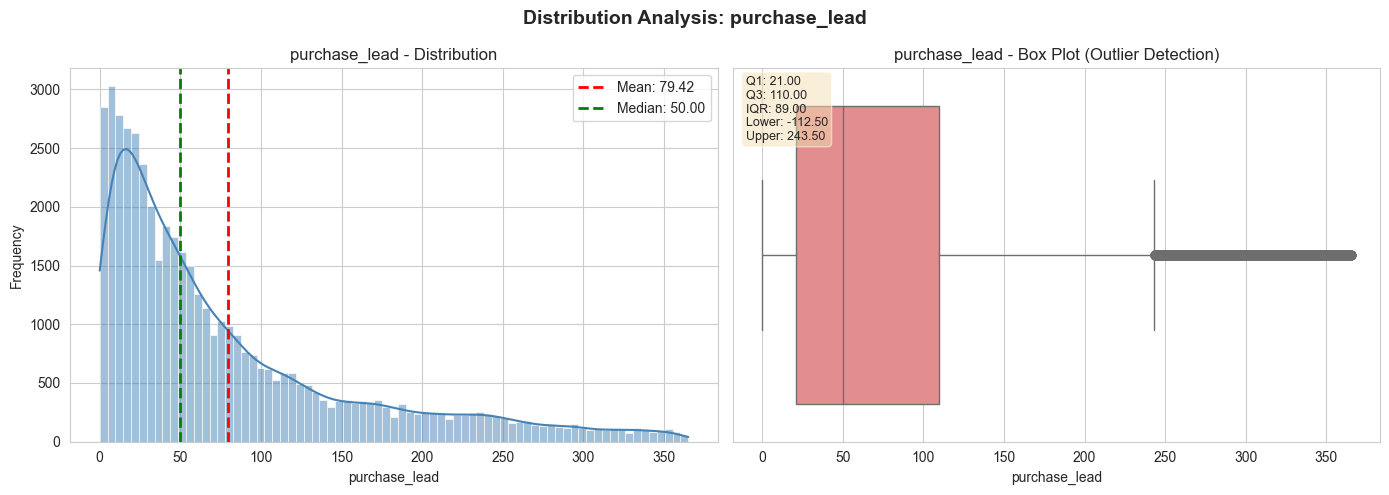

Summary Statistics for 'purchase_lead':
  Count:    47843
  Mean:     79.42
  Median:   50.00
  Std Dev:  80.87
  Min:      0.00
  Max:      365.00
  Skewness: 1.463


length_of_stay (Post Outlier Removal)


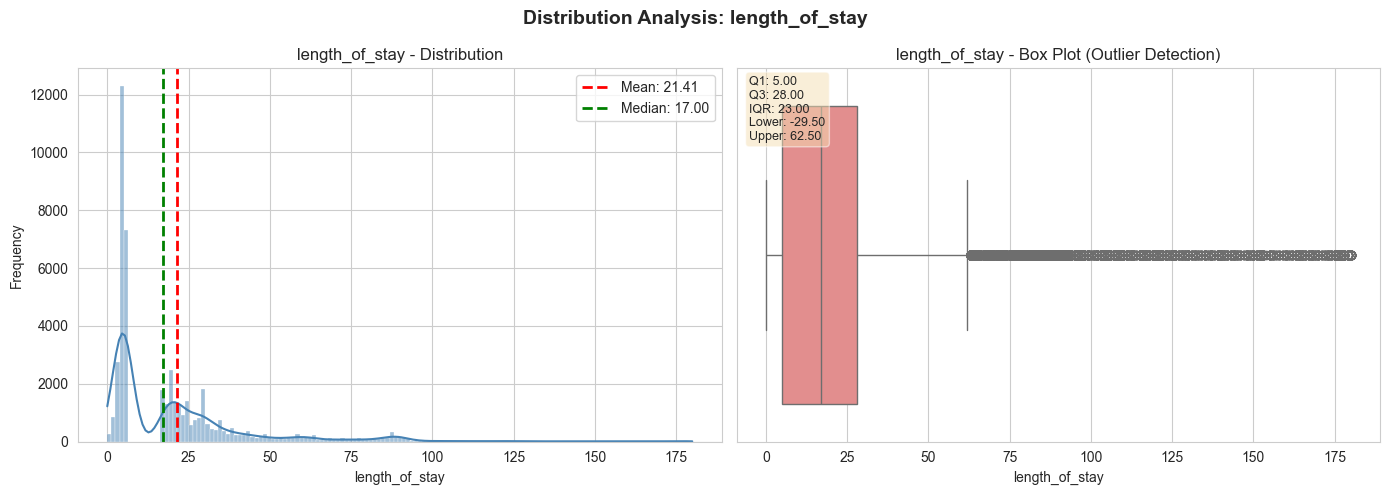

Summary Statistics for 'length_of_stay':
  Count:    47843
  Mean:     21.41
  Median:   17.00
  Std Dev:  25.08
  Min:      0.00
  Max:      180.00
  Skewness: 2.492


flight_hour (Post Outlier Removal)


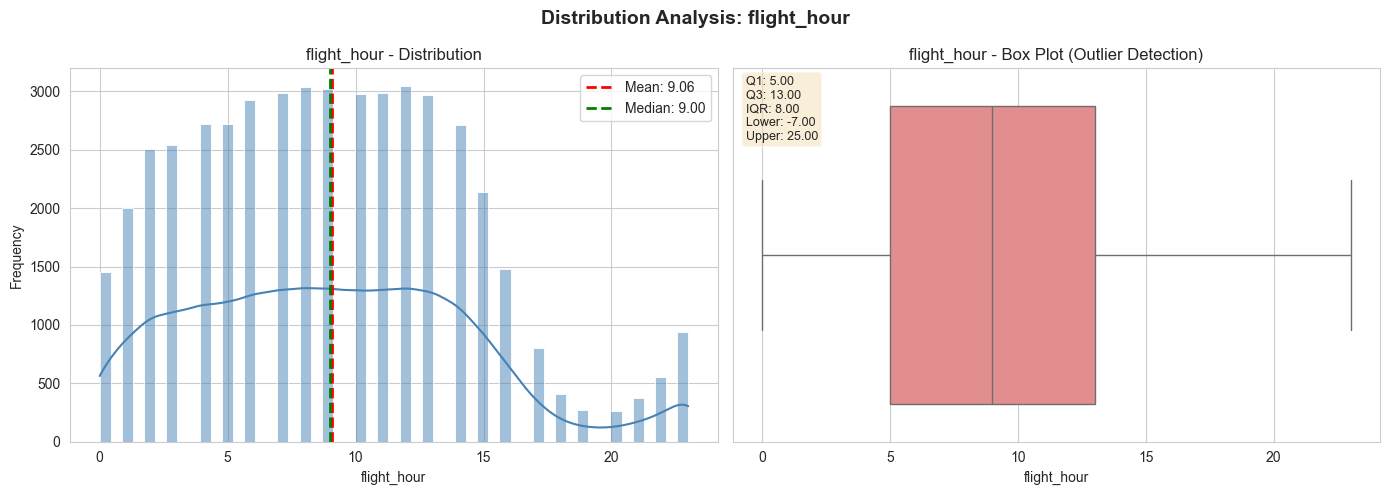

Summary Statistics for 'flight_hour':
  Count:    47843
  Mean:     9.06
  Median:   9.00
  Std Dev:  5.40
  Min:      0.00
  Max:      23.00
  Skewness: 0.398


flight_duration (Post Outlier Removal)


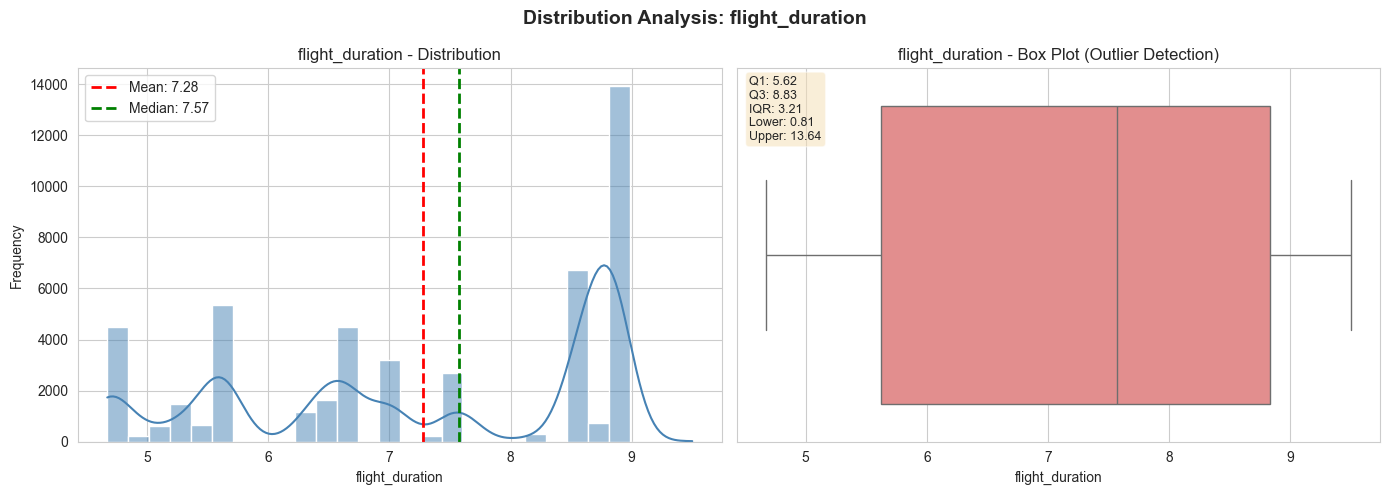

Summary Statistics for 'flight_duration':
  Count:    47843
  Mean:     7.28
  Median:   7.57
  Std Dev:  1.50
  Min:      4.67
  Max:      9.50
  Skewness: -0.361




In [17]:
# Vizualize all numerical columns again using the function after outlier removal
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 
                  'flight_duration']
for col in numerical_cols:
    print(f"{col} (Post Outlier Removal)")
    plot_distribution_and_boxplot(df, col)
    print("\n")

## Feature Engineering - Handle Skewed Distributions

Based on the distribution analysis:
- **purchase_lead** and **length_of_stay** show strong right skewness
- Log transformation will normalize these distributions for better model performance
- We'll create transformed versions while keeping originals for reference

In [18]:
# Apply log transformation to right-skewed features
import numpy as np

print("Applying Log Transformations to Skewed Features")

# Features identified with strong right skew
skewed_features = ['purchase_lead', 'length_of_stay']

# Store original values for comparison
for col in skewed_features:
    print(f"\n{col}:")
    print(f"  Original - Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    
    # Apply log1p transformation (log(1+x) to handle zeros)
    df[f'{col}_log'] = np.log1p(df[col])
    
    print(f"  Transformed - Mean: {df[f'{col}_log'].mean():.2f}, Median: {df[f'{col}_log'].median():.2f}")
    print(f"    Created new column: {col}_log")

print(f"New columns added: {[f'{col}_log' for col in skewed_features]}")
print(f"Dataset now has {len(df.columns)} columns")


Applying Log Transformations to Skewed Features

purchase_lead:
  Original - Mean: 79.42, Median: 50.00
  Transformed - Mean: 3.81, Median: 3.93
    Created new column: purchase_lead_log

length_of_stay:
  Original - Mean: 21.41, Median: 17.00
  Transformed - Mean: 2.62, Median: 2.89
    Created new column: length_of_stay_log
New columns added: ['purchase_lead_log', 'length_of_stay_log']
Dataset now has 16 columns


Comparing Original vs Log-Transformed Distributions


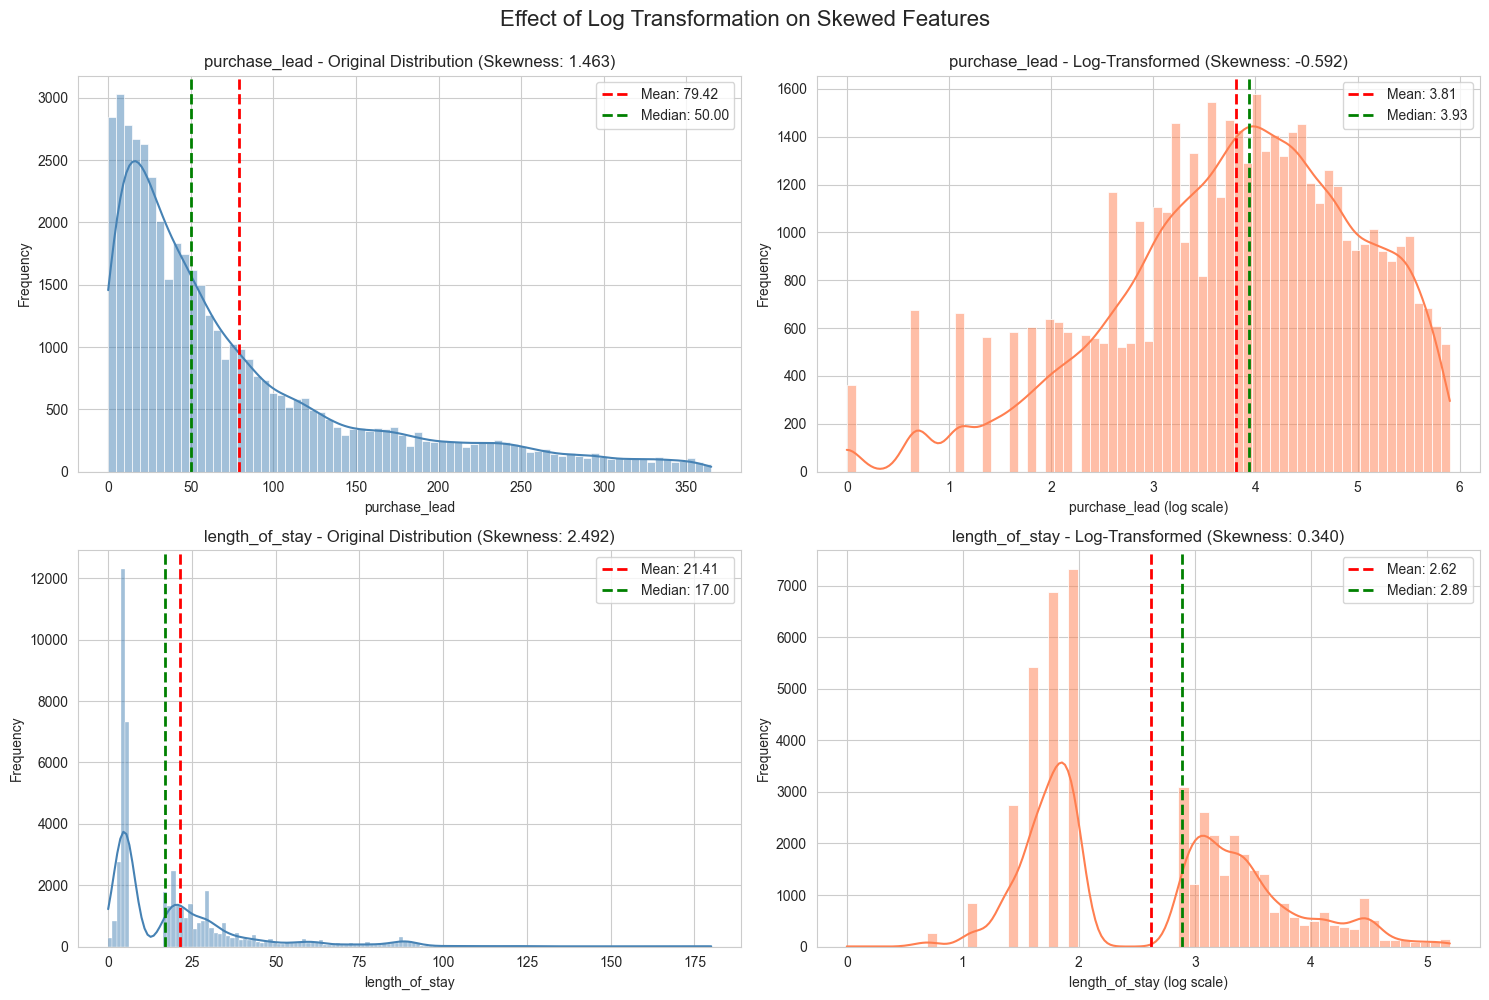

In [19]:
# Visualize the effect of log transformation
import matplotlib.pyplot as plt
import seaborn as sns

print("Comparing Original vs Log-Transformed Distributions")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Effect of Log Transformation on Skewed Features', fontsize=16, y=0.995)

skewed_features = ['purchase_lead', 'length_of_stay']

for idx, col in enumerate(skewed_features):
    # Original distribution
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0], color='steelblue')
    axes[idx, 0].set_title(f'{col} - Original Distribution (Skewness: {df[col].skew():.3f})')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx, 0].legend()
    
    # Log-transformed distribution
    log_col = f'{col}_log'
    sns.histplot(data=df, x=log_col, kde=True, ax=axes[idx, 1], color='coral')
    axes[idx, 1].set_title(f'{col} - Log-Transformed (Skewness: {df[log_col].skew():.3f})')
    axes[idx, 1].set_xlabel(f'{col} (log scale)')
    axes[idx, 1].set_ylabel('Frequency')
    
    # Add mean and median lines for transformed
    mean_val_log = df[log_col].mean()
    median_val_log = df[log_col].median()
    axes[idx, 1].axvline(mean_val_log, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val_log:.2f}')
    axes[idx, 1].axvline(median_val_log, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val_log:.2f}')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

### Summary of Data Transformations

**Skewed Features Addressed:**
1. **purchase_lead** → `purchase_lead_log`
   - Original skewness reduced through log transformation
   - Better captures the pattern: most book soon, few book very early
   
2. **length_of_stay** → `length_of_stay_log`
   - Normalized the distribution of stay durations
   - Reduces impact of extreme long stays on model

**For ML Model:**
- Use the log


In [20]:
# Save the new df into a csv file for future use
df.to_csv("data/cleaned/passenger_booking_data_cleaned.csv", index=False)

In [21]:
# Display the cleaned dataframe
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_log,length_of_stay_log
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,3.091042,2.564949
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,5.572154,2.995732
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,4.727388,3.044522
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,5.497168,3.135494
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,4.574711,3.465736
